# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt

# Importing the Dataset

In [2]:
data = pd.read_csv("Loan_Data.csv")

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Understanding the Data

In [4]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
data.shape

(614, 13)

In [8]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

* There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History features.
* For numerical variables: imputation using mean or median
* For categorical variables: imputation using mode

In [9]:
data.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [10]:
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True) 
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True) 
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True) 
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

In [11]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [12]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)

In [13]:
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)

In [15]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [16]:
data.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


# Univariate Analysis

In [17]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [18]:
data['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

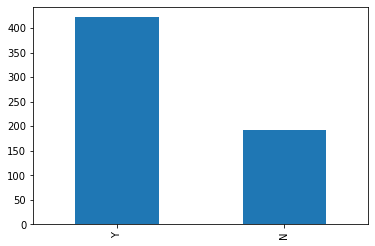

In [19]:
data['Loan_Status'].value_counts().plot.bar()

* The loan of 422 people out of 614 was approved
* The approval rate is around 68.73%

### Categorical Variables

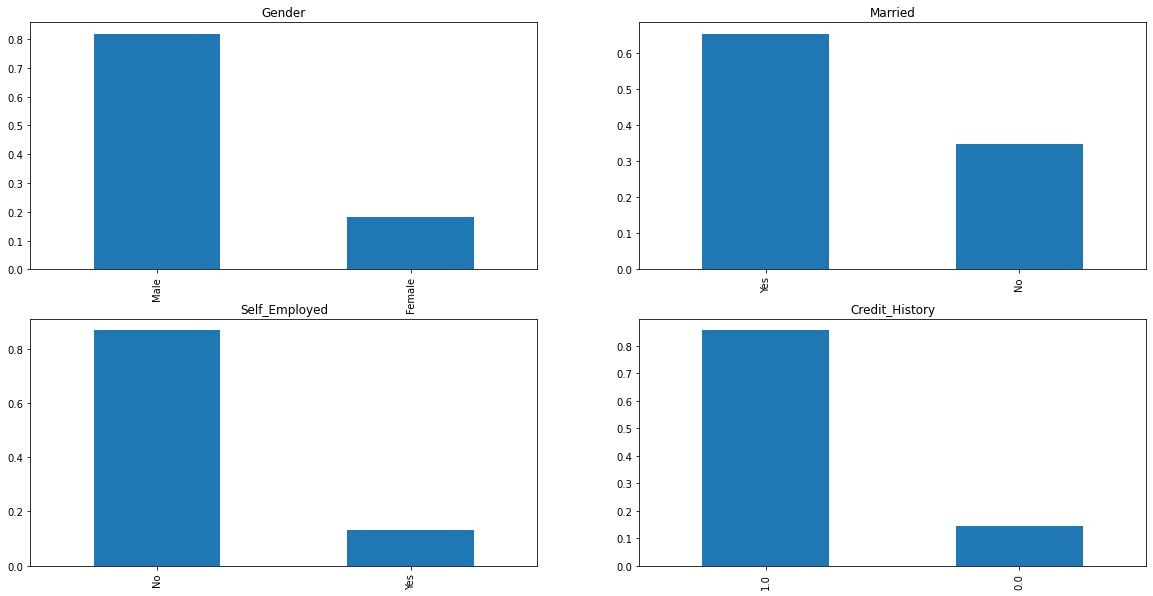

In [21]:
plt.figure(1) 
plt.subplot(221) 
data['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender') 
plt.subplot(222)
data['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(223)
data['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.subplot(224) 
data['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 
plt.show()

It can be inferred from the above bar plots that:

* 81.76% applicants in the dataset are male.
* Around 65.31% of the applicants in the dataset are married.
* Around 13.36% applicants in the dataset are self employed.
* Around 85.5% applicants have repaid their debts.

In [27]:
data['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [28]:
data['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [29]:
data['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [30]:
data['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

### Ordinal Variables

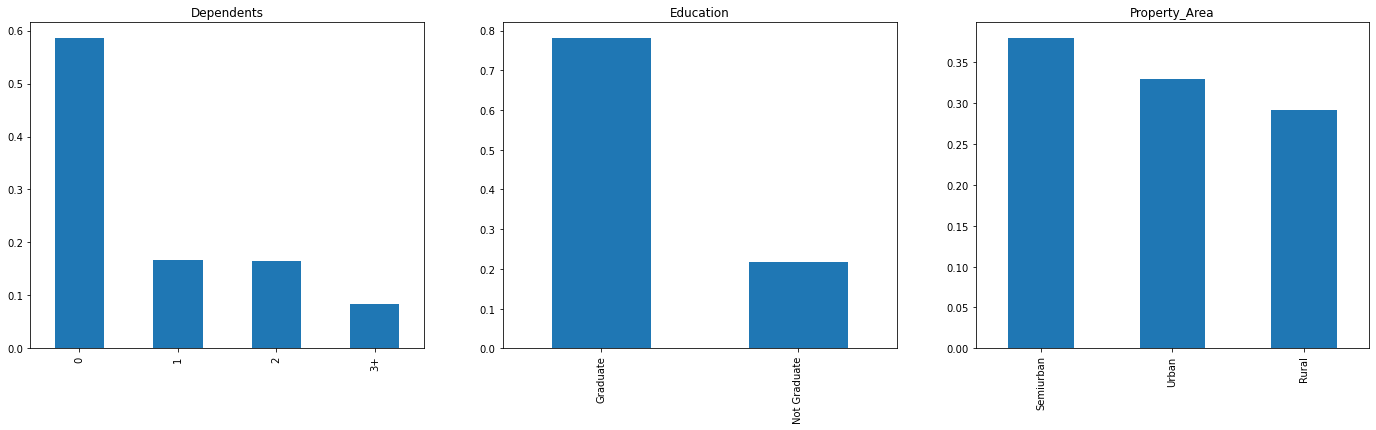

In [32]:
plt.figure(1) 
plt.subplot(131) 
data['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents') 
plt.subplot(132)
data['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.subplot(133) 
data['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 
plt.show()

Following inferences can be made from the above bar plots:

* 58.63% of the applicants don’t have any dependents.
* 78.18% of the applicants are Graduate.
* Majority (37.95%) of the applicants are from Semiurban area.

In [37]:
data['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [38]:
data['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [39]:
data['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

### Numerical Variables

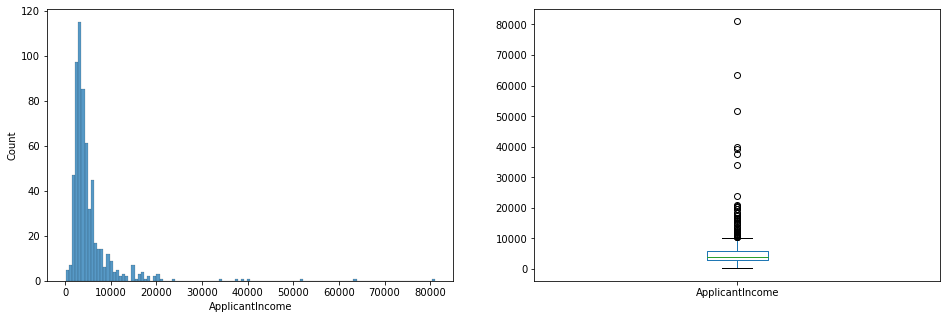

In [46]:
plt.figure(1) 
plt.subplot(121) 
sea.histplot(data['ApplicantIncome']); 
plt.subplot(122) 
data['ApplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

* It can be inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed.

* The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society

Text(0.5, 0.98, '')

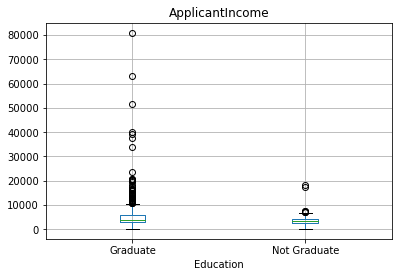

In [47]:
data.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle("")

We can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

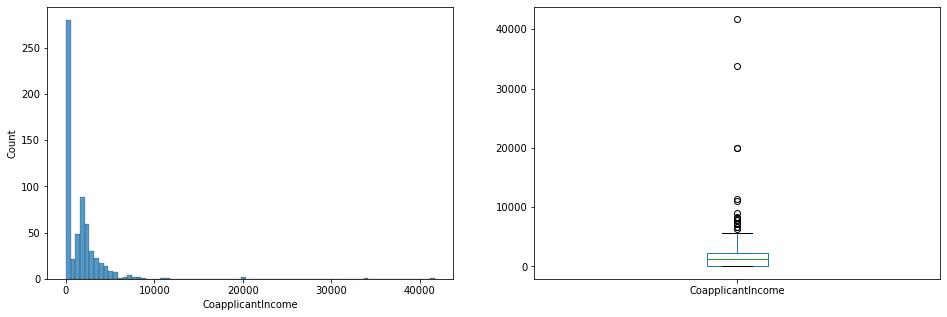

In [49]:
plt.figure(1) 
plt.subplot(121) 
sea.histplot(data['CoapplicantIncome']); 
plt.subplot(122) 
data['CoapplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

* Majority of coapplicant’s income ranges from 0 to 5000.
* We also see a lot of outliers in the coapplicant income and it is not normally distributed.

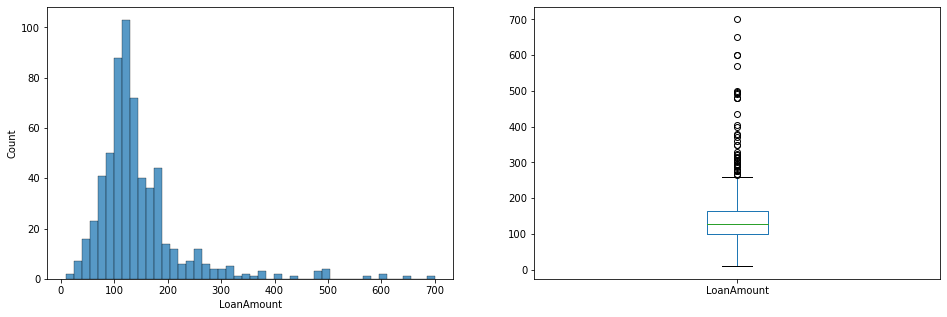

In [51]:
plt.figure(1) 
plt.subplot(121) 
df=data.dropna() 
sea.histplot(df['LoanAmount']); 
plt.subplot(122) 
df['LoanAmount'].plot.box(figsize=(16,5)) 
plt.show()

* Outliers are present
* the distribution is fairly normal.

# Bivariate Analysis

### Categorical Variable vs Target Variable

<AxesSubplot:xlabel='Gender'>

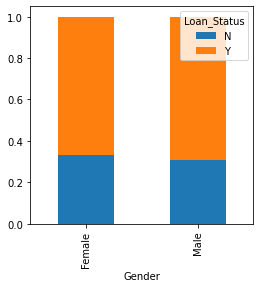

In [52]:
Gender=pd.crosstab(data['Gender'],data['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

It can be inferred that the proportion of male and female applicants is more or less same for both approved and unapproved loans.

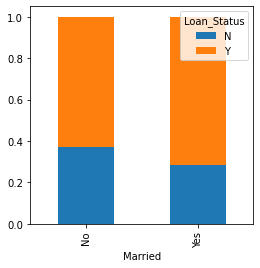

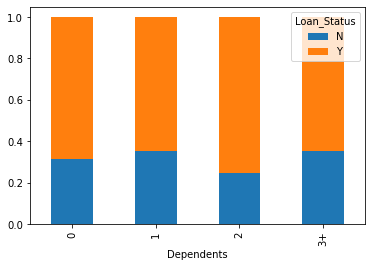

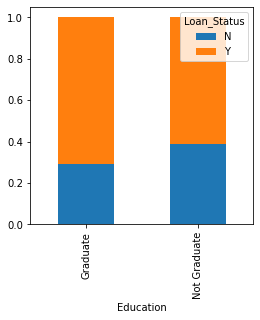

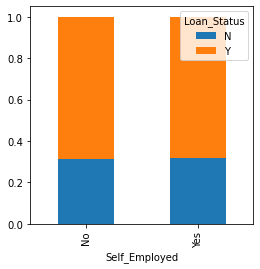

In [53]:
Married=pd.crosstab(data['Married'],data['Loan_Status']) 
Dependents=pd.crosstab(data['Dependents'],data['Loan_Status']) 
Education=pd.crosstab(data['Education'],data['Loan_Status'])
Self_Employed=pd.crosstab(data['Self_Employed'],data['Loan_Status']) 
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show() 
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show() 
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show() 
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show()

* Proportion of married applicants is higher for the approved loans.
* Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
* There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

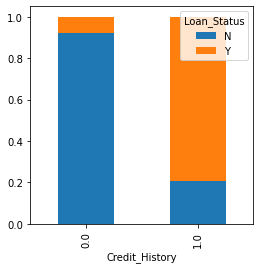

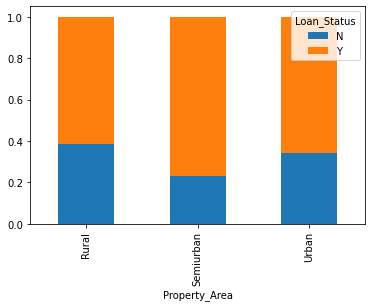

In [54]:
Credit_History=pd.crosstab(data['Credit_History'],data['Loan_Status'])
Property_Area=pd.crosstab(data['Property_Area'],data['Loan_Status']) 
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show() 
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show()

* It seems people with credit history as 1 are more likely to get their loans approved.
* Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

### Numerical Variable vs Target Variable

<AxesSubplot:xlabel='Loan_Status'>

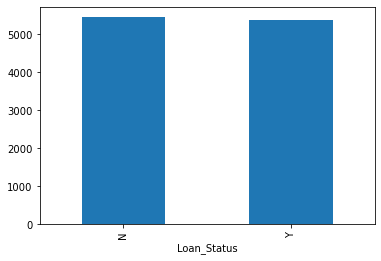

In [55]:
data.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

There is not visible difference between the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.

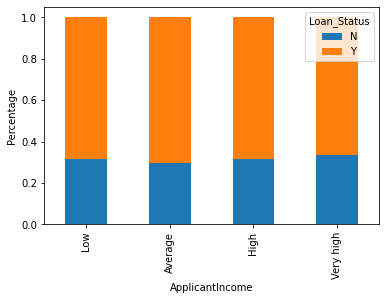

In [56]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
data['Income_bin']=pd.cut(data['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(data['Income_bin'],data['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('ApplicantIncome') 
P = plt.ylabel('Percentage')

Analysing bins for the applicant income variable based on the values in it and the corresponding loan status for each bin.It can be inferred that Applicant income does not affect the chances of loan approval

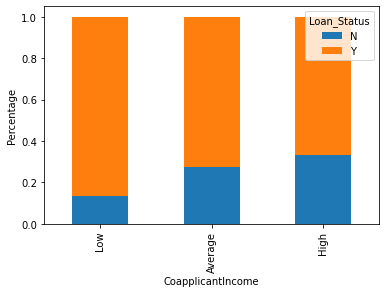

In [58]:
bins=[0,1000,3000,42000] 
group=['Low','Average','High']
data['Coapplicant_Income_bin']=pd.cut(data['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(data['Coapplicant_Income_bin'],data['Loan_Status']) 
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

coapplicant’s income is less the chances of loan approval are high

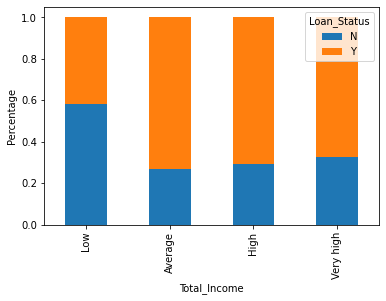

In [59]:
data['Total_Income']=data['ApplicantIncome']+data['CoapplicantIncome']
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high']
data['Total_Income_bin']=pd.cut(data['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(data['Total_Income_bin'],data['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income') 
P = plt.ylabel('Percentage')

Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and Very High Income.

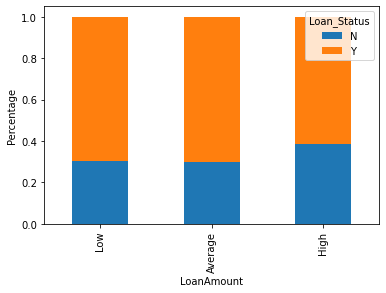

In [60]:
bins=[0,100,200,700]
group=['Low','Average','High'] 
data['LoanAmount_bin']=pd.cut(data['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(data['LoanAmount_bin'],data['Loan_Status']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')

the proportion of approved loans is __higher__ for __Low and Average Loan Amount__ as compared to that of High Loan Amount

In [61]:
data=data.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)
data['Dependents'].replace('3+', 3,inplace=True) 
data['Loan_Status'].replace('N', 0,inplace=True)
data['Loan_Status'].replace('Y', 1,inplace=True)

<AxesSubplot:>

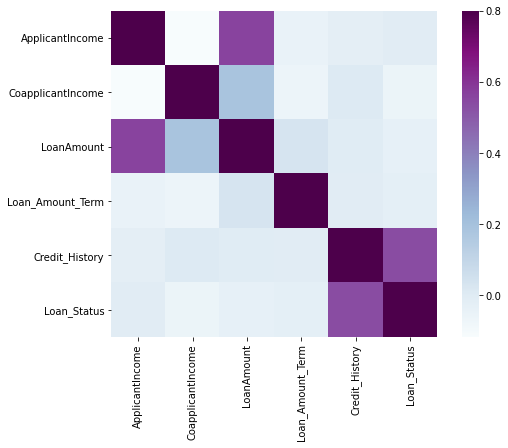

In [62]:
matrix = data.corr()
f, ax = plt.subplots(figsize=(9, 6))
sea.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")

* Highly correlated variables are (ApplicantIncome - LoanAmount)
* Also (Credit_History - Loan_Status). is higly correlated
* LoanAmount is also correlated with CoapplicantIncome.

# Feature Engineering

<AxesSubplot:>

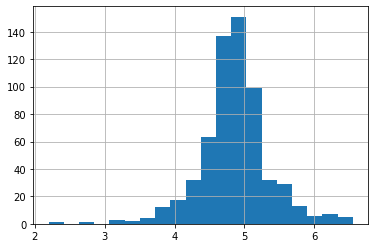

In [63]:
data['LoanAmount_log'] = np.log(data['LoanAmount']) 
data['LoanAmount_log'].hist(bins=20) 

the distribution looks much closer to normal and effect of extreme values has been significantly subsided.

In [64]:
data['Total_Income']=data['ApplicantIncome']+data['CoapplicantIncome'] 

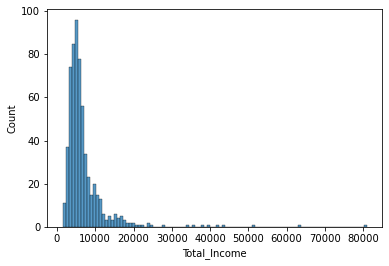

In [71]:
sea.histplot(data['Total_Income']);

Distribution is shifted towards left, i.e., the distribution is right skewed.

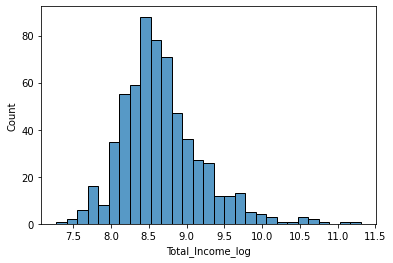

In [72]:
data['Total_Income_log'] = np.log(data['Total_Income']) 
sea.histplot(data['Total_Income_log']); 

* After taking the log transformation to make the distribution normal.
* Now the distribution looks much closer to normal

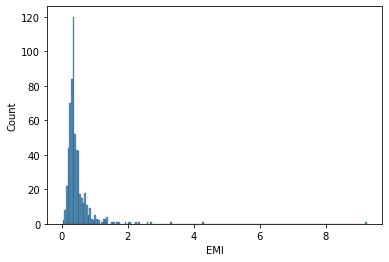

In [74]:
data['EMI']=data['LoanAmount']/data['Loan_Amount_Term']
sea.histplot(data['EMI']);

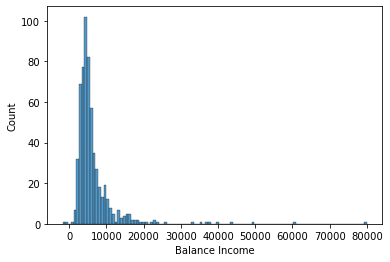

In [76]:
data['Balance Income']=data['Total_Income']-(data['EMI']*1000)
sea.histplot(data['Balance Income']);

In [77]:
data=data.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1) 

* drop the variables which we used to create these new features.
* because the correlation between those old features and these new features will be very high
* removing correlated features will help in reducing the noise too.

In [78]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_Income,Total_Income_log,EMI,Balance Income
0,LP001002,Male,No,0,Graduate,No,1.0,Urban,1,4.852030,5849.0,8.674026,0.355556,5493.444444
1,LP001003,Male,Yes,1,Graduate,No,1.0,Rural,0,4.852030,6091.0,8.714568,0.355556,5735.444444
2,LP001005,Male,Yes,0,Graduate,Yes,1.0,Urban,1,4.189655,3000.0,8.006368,0.183333,2816.666667
3,LP001006,Male,Yes,0,Not Graduate,No,1.0,Urban,1,4.787492,4941.0,8.505323,0.333333,4607.666667
4,LP001008,Male,No,0,Graduate,No,1.0,Urban,1,4.948760,6000.0,8.699515,0.391667,5608.333333


# Building the Model

In [81]:
data=data.drop('Loan_ID',axis=1) 

KeyError: "['Loan_ID'] not found in axis"

Loan Id is not a significant variable and it is not required as a feature for building model

In [82]:
X = data.drop('Loan_Status',1)
y = data.Loan_Status

Loan Status is target variabel so seggregating it

In [85]:
X=pd.get_dummies(X) 
data=pd.get_dummies(data) 

Dummy variables for Categorical Variable so each category can be given as a seperate feature to the model

In [92]:
from sklearn import tree
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import graphviz

In [87]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=3,shuffle=True) 
accuracy_list = []
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))   
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = tree.DecisionTreeClassifier(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test) 
    accuracy_list.append(score)
    print('accuracy_score',score)     
    i+=1 


1 of kfold 5
accuracy_score 0.6829268292682927

2 of kfold 5
accuracy_score 0.6422764227642277

3 of kfold 5
accuracy_score 0.7642276422764228

4 of kfold 5
accuracy_score 0.7479674796747967

5 of kfold 5
accuracy_score 0.6721311475409836


In [88]:
mean_accuracy = sum(accuracy_list)/ len(accuracy_list)
print(mean_accuracy)

0.7019059043049447


Mean Accuracy for the model is around 0.70

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Credit_History           614 non-null    float64
 1   Loan_Status              614 non-null    int64  
 2   LoanAmount_log           614 non-null    float64
 3   Total_Income             614 non-null    float64
 4   Total_Income_log         614 non-null    float64
 5   EMI                      614 non-null    float64
 6   Balance Income           614 non-null    float64
 7   Gender_Female            614 non-null    uint8  
 8   Gender_Male              614 non-null    uint8  
 9   Married_No               614 non-null    uint8  
 10  Married_Yes              614 non-null    uint8  
 11  Dependents_3             614 non-null    uint8  
 12  Dependents_0             614 non-null    uint8  
 13  Dependents_1             614 non-null    uint8  
 14  Dependents_2             6

In [98]:
X.head()

,Credit_History,LoanAmount_log,Total_Income,Total_Income_log,EMI,Balance Income,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,4.852030,5849.0,8.674026,0.355556,5493.444444,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1
1,1.0,4.852030,6091.0,8.714568,0.355556,5735.444444,0,1,0,1,...,0,1,0,1,0,1,0,1,0,0
2,1.0,4.189655,3000.0,8.006368,0.183333,2816.666667,0,1,0,1,...,1,0,0,1,0,0,1,0,0,1
3,1.0,4.787492,4941.0,8.505323,0.333333,4607.666667,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
4,1.0,4.948760,6000.0,8.699515,0.391667,5608.333333,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1


In [99]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [100]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [101]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=0)

In [103]:
clf = DecisionTreeClassifier(max_depth = 2, random_state = 0)
clf.fit(X_train, Y_train)
clf.predict(X_test)

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0],
      dtype=int64)

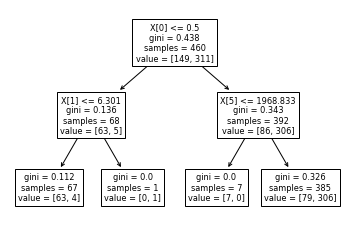

In [104]:
tree.plot_tree(clf);